In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


Hello Everyone!I am a Beginner in this Field ! I am used Python Language to Predict the Dependent Variable(Salary) to see which varialbes have most relationship will dependent variable(Multiple linear Regression)
Use various Machine learning too and Libraries!
- Numpy ,Pandas , matplotlib ,seaborn!
- Missing Values
- Detecting Outliers
- Multiple Linear Regression (Backward Elimination)
- Assumption on Linear Regression
- Prediction on Test dataset 

# Import our Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sn
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import  variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Importing our Dataset

In [4]:
data = pd.read_csv(r"/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

In [5]:
data.head() # Reture 1st (5) Rows

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
data.tail()  # Return Last (5) Rows

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


# Data Types and Shape of the Dataset

In [7]:
data.shape

(215, 15)

In [8]:
data.info() # To showcast which variable contain which type of Datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [9]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [10]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Checking the Missing Values

In [11]:
missing_value_presentage =round(data.isnull().sum()*100/len(data),2).reset_index()
missing_value_presentage.columns = ['column_name','missing_value_presentage']
missing_value_presentage = missing_value_presentage.sort_values('missing_value_presentage',ascending =False)
missing_value_presentage

,column_name,missing_value_presentage
14,salary,31.16
0,sl_no,0.00
1,gender,0.00
2,ssc_p,0.00
3,ssc_b,0.00
4,hsc_p,0.00
5,hsc_b,0.00
6,hsc_s,0.00
7,degree_p,0.00
8,degree_t,0.00


# As we all can see only the Salary varaible contain the Missing values : 31.16 % with is not less then the 50%. So we can replace the missing values by (Mean)

In [12]:
data['salary'].fillna(data['salary'].mean(),inplace =True)

# Once again Run the Same Code

In [13]:
missing_value_presentage =round(data.isnull().sum()*100/len(data),2).reset_index()
missing_value_presentage.columns = ['column_name','missing_value_presentage']
missing_value_presentage = missing_value_presentage.sort_values('missing_value_presentage',ascending =False)
missing_value_presentage

,column_name,missing_value_presentage
0,sl_no,0.0
1,gender,0.0
2,ssc_p,0.0
3,ssc_b,0.0
4,hsc_p,0.0
5,hsc_b,0.0
6,hsc_s,0.0
7,degree_p,0.0
8,degree_t,0.0
9,workex,0.0


# Find which varaibles contain whic type of data type?

In [14]:
data_num =data[data.select_dtypes(include=[np.number]).columns.tolist()]

In [15]:
data_num.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,77457.900102
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,250000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,288655.405405
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,288655.405405
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [16]:
# take out our String columns
data_str = data[data.select_dtypes(exclude=[np.number]).columns.tolist()]

In [17]:
data_str.describe(include ='all')

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


# For the Object variables U First have to make all the variables into the Numeric format using the  ( LabelEncoder)

In [18]:
from sklearn.preprocessing import LabelEncoder
# Label Encoder Perform on all the Varaible which contains the (Object Datatype)

In [19]:
data_str.gender =(LabelEncoder().fit_transform(data_str.gender))
data_str.ssc_b =(LabelEncoder().fit_transform(data_str.ssc_b))
data_str.hsc_b =(LabelEncoder().fit_transform(data_str.hsc_b))
data_str.hsc_s =(LabelEncoder().fit_transform(data_str.hsc_s))
data_str.degree_t =(LabelEncoder().fit_transform(data_str.degree_t))
data_str.workex =(LabelEncoder().fit_transform(data_str.workex))
data_str.specialisation=(LabelEncoder().fit_transform(data_str.specialisation))
data_str.status =(LabelEncoder().fit_transform(data_str.status))

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
dataset = pd.concat([data_str,data_num],axis = 1)

In [21]:
dataset.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1,1,1,1,2,0,1,1,1,67.00,91.00,58.00,55.0,58.80,270000.000000
1,1,0,1,2,2,1,0,1,2,79.33,78.33,77.48,86.5,66.28,200000.000000
2,1,0,0,0,0,0,0,1,3,65.00,68.00,64.00,75.0,57.80,250000.000000
3,1,0,0,2,2,0,1,0,4,56.00,52.00,52.00,66.0,59.43,288655.405405
4,1,0,0,1,0,0,0,1,5,85.80,73.60,73.30,96.8,55.50,425000.000000


# Detection of Outlier (Boxplot &Barplot)

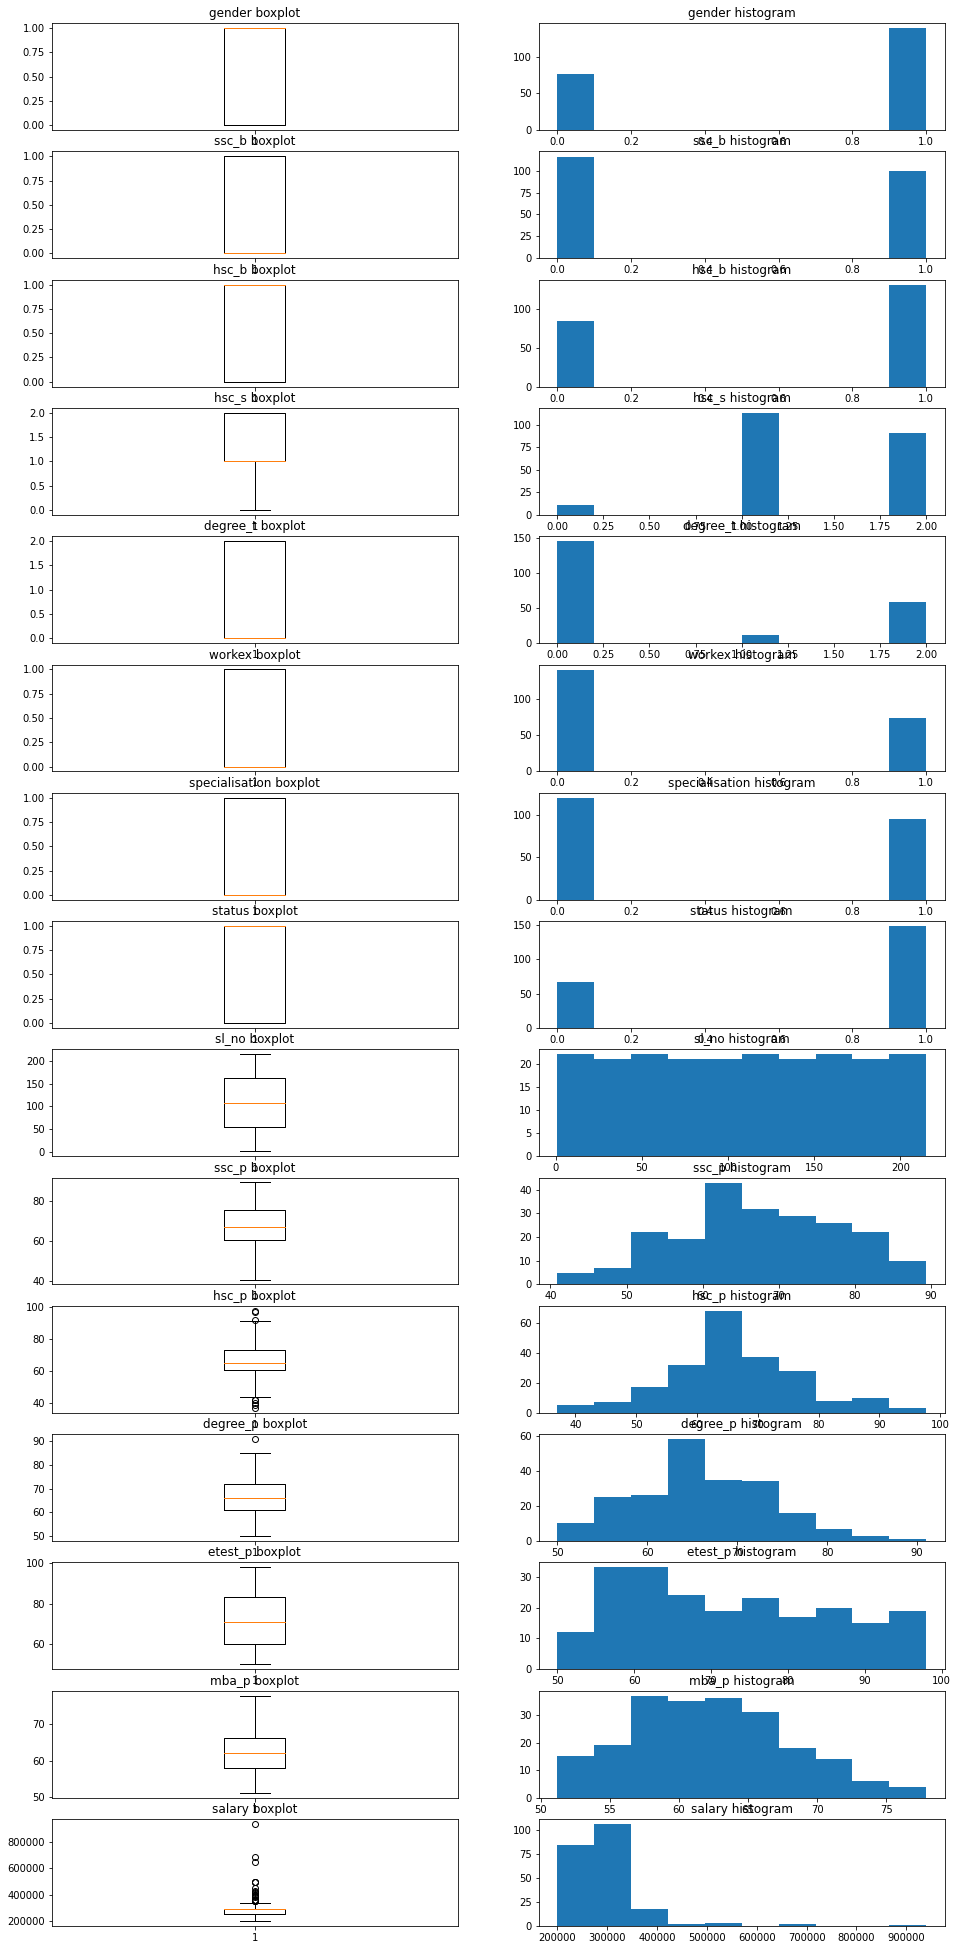

In [22]:
#  Outliers Detection
cont_vars =list(dataset.columns)[:]
def outlier_visual(dataset):
    plt.figure(figsize=(16,35))
    i = 0
    for col in cont_vars:
        i+= 1
        plt.subplot(15,2,i)
        plt.boxplot(dataset[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(15,2,i)
        plt.hist(dataset[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outlier_visual(dataset)


# AS u can see Only Two columns contain the Outliers (hsc_p & Salary)

We are going to remove the outliers using the IQR

In [23]:
############################# hsc_p #########################
q1 = dataset['hsc_p'].quantile(0.25)
q3 = dataset['hsc_p'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

(42.75, 91.15)

In [24]:
dataset['hsc_p']=np.where(dataset['hsc_p'] > high,high,dataset['hsc_p']) # upper limit
dataset['hsc_p']=np.where(dataset['hsc_p'] < low,low,dataset['hsc_p']) # low limit

In [25]:
############################# Salary ########################################
q1 = dataset['salary'].quantile(0.25)
q3 = dataset['salary'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

(192016.89189189192, 346638.5135135135)

In [26]:
dataset['salary']=np.where(dataset['salary'] > high,high,dataset['salary']) # upper limit

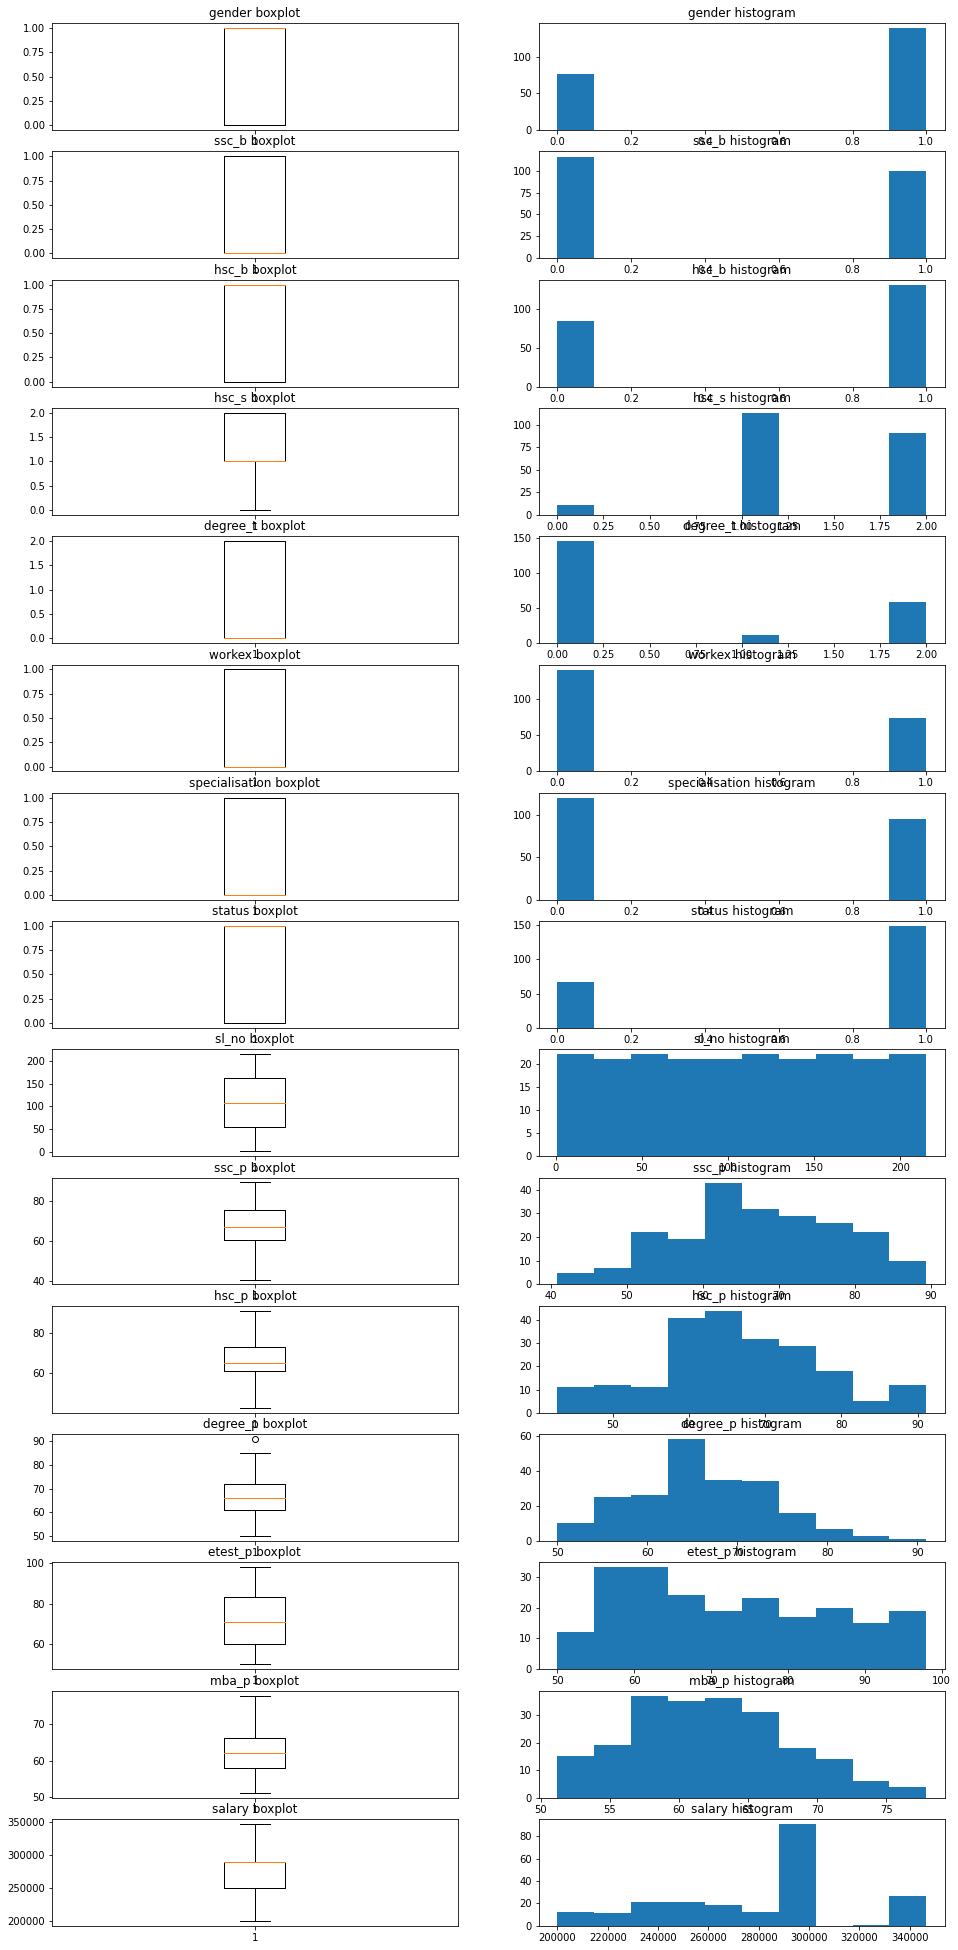

In [27]:
outlier_visual(dataset)

# Data Visualization

# Who is getting more placements girls or boys?

In [35]:
def plot(dataset,x,y):
    plt.Figure(figsize =(10,10))
    sns.boxplot(x = data[x],y= data[y])
    g = sns.FacetGrid(data, row = y)
    g = g.map(plt.hist,x)
    plt.show()

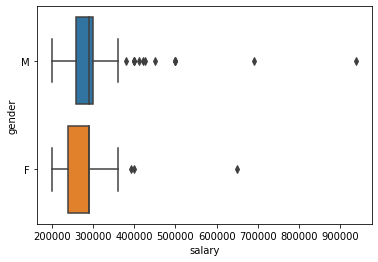

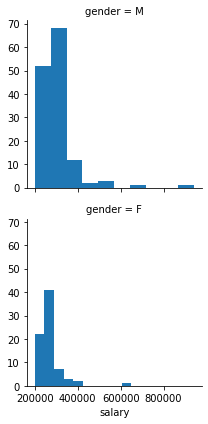

In [36]:
plot(dataset,"salary","gender")

- The Range of salary is high for boys with the median of 2.5 Lakhs per annum
- The Median salary for girls is 2.1 Lakhs per annum
- The highest package is offered to a boy which is nearly 10 Lakhs per annum
- The highest package offered for girls is 7 Lakhs per annum
- Total number girls not placed are 30 and Total number of boys not placed are 40

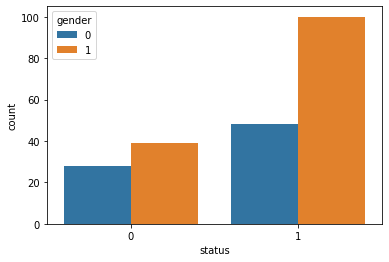

In [37]:
sns.countplot(dataset['status'],hue=dataset['gender'])

 As u can see that  Boys have got the more number of placement !! Ratio is also more great 100:50

# To get placed in a company with high package which board should I choose (Central or State board) in 10th?

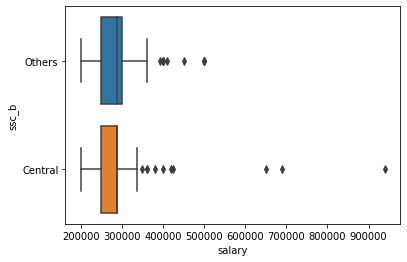

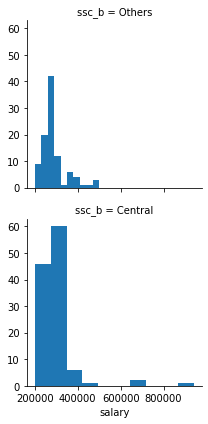

In [38]:
plot(dataset,"salary","ssc_b")

- The Range of salary is high for central board students with the median of 2.5 Lakhs per annum
- The Median salary for other board students is 2.3 Lakhs per annum
- The highest package is offered to a central board student which is nearly 10 Lakhs per annum and as per our previous finding the student is a boy
- The highest package offered for other board students is 5 Lakhs per annum
- Total number central board students not placed are 27 and Total number of other board student not placed are 37

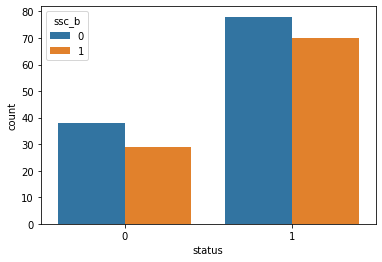

In [39]:
sns.countplot(dataset['status'],hue=dataset['ssc_b'])

# To get placed in a company with high package which board should I choose (Central or State board) in 12th?

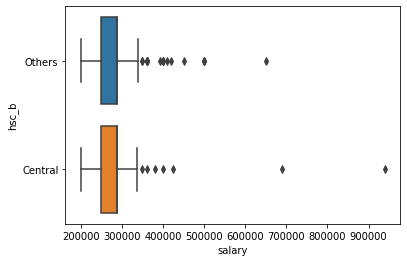

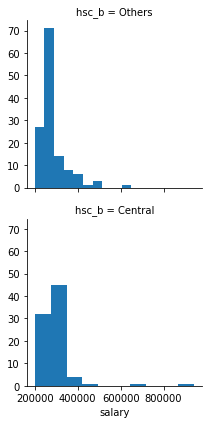

In [40]:
plot(dataset,"salary","hsc_b")

# Who is mostly not getting placed?

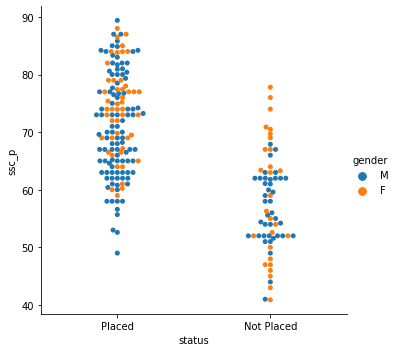

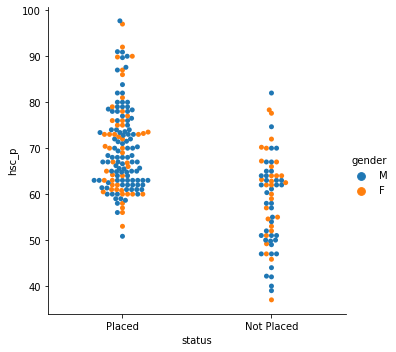

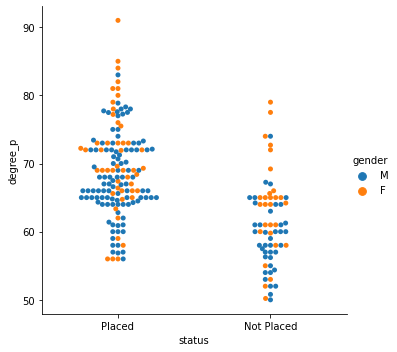

In [41]:
sns.catplot(x="status", y="ssc_p", data=data,kind="swarm",hue='gender')
sns.catplot(x="status", y="hsc_p", data=data,kind="swarm",hue='gender')
sns.catplot(x="status", y="degree_p", data=data,kind="swarm",hue='gender')

The students who have scored less than 60 percent in 10th or 12th or degree are mostly not getting placed because they don't even have basic eligibility(more than 60 percent in 10th,12th and degree)

# Which stream students are getting more placed and which stream students are mostly not placed?

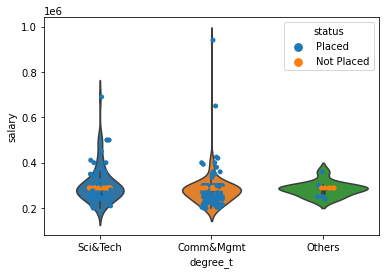

In [42]:
sns.violinplot(x="degree_t", y="salary", data=data)
sns.stripplot(x="degree_t", y="salary", data=data,hue='status')

The stream in which the students mostly get placed are Commucation and management , also science and technology students are mostly getting placed and other stream students are not getting that much placements due to less number of students...

# Data Partition

In [44]:
    X = dataset.drop('salary', axis = 1)
    Y = dataset[['salary']]
    # Split X and y into X_
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [45]:
# Correlation Matrix 
dataset_exp =pd.concat([y_train,X_train],axis = 1)

,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
salary,1.000000,0.128306,0.110059,0.055941,0.043513,0.196771,0.018262,-0.056890,-0.184157,0.037378,-0.033233,-0.011471,-0.007664,0.189722,0.243762
gender,0.128306,1.000000,0.036404,0.044999,0.089802,0.071026,0.101954,-0.120243,0.121814,0.080579,-0.012411,-0.027853,-0.161391,0.141330,-0.314961
ssc_b,0.110059,0.036404,1.000000,0.599915,-0.008456,0.083466,-0.037776,-0.074497,0.020041,0.042369,0.092326,-0.118445,0.036268,0.010237,0.072872
hsc_b,0.055941,0.044999,0.599915,1.000000,0.118559,0.037932,0.060693,0.011483,0.035217,0.120574,0.066354,0.023913,0.125499,0.100042,0.084083
hsc_s,0.043513,0.089802,-0.008456,0.118559,1.000000,0.577145,0.031275,0.185695,0.078165,0.009309,0.255960,-0.114728,0.153628,0.103835,0.088014
degree_t,0.196771,0.071026,0.083466,0.037932,0.577145,1.000000,0.164074,0.101287,0.003337,0.020153,0.226845,-0.075819,0.117751,0.062906,0.139183
workex,0.018262,0.101954,-0.037776,0.060693,0.031275,0.164074,1.000000,-0.173092,0.230549,0.093496,0.151533,0.116687,0.049509,0.049684,0.092321
specialisation,-0.056890,-0.120243,-0.074497,0.011483,0.185695,0.101287,-0.173092,1.000000,-0.214075,0.024562,-0.139857,-0.259909,-0.211077,-0.236857,-0.111063
status,-0.184157,0.121814,0.020041,0.035217,0.078165,0.003337,0.230549,-0.214075,1.000000,0.008819,0.633429,0.470333,0.440543,0.128336,0.085229
sl_no,0.037378,0.080579,0.042369,0.120574,0.009309,0.020153,0.093496,0.024562,0.008819,1.000000,-0.065037,-0.072097,-0.083667,0.031276,0.019442


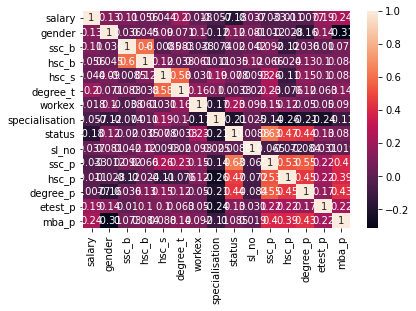

In [46]:
# calculate the correlation matrix
corr = dataset_exp.corr()
display(corr)
# plot the correlation heatmap
sns.heatmap(corr,annot =True)

# Model Building

In [47]:
import statsmodels.api as sm
X_1 = sm.add_constant(X_train)
# create a OLS model
model = sm.OLS(y_train, X_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     3.020
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           0.000387
Time:                        14:01:54   Log-Likelihood:                -2040.4
No. Observations:                 172   AIC:                             4111.
Df Residuals:                     157   BIC:                             4158.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.451e+05   4.03e+04      3.

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


 # Multicolinearity (with the help of VIF)

In [48]:
X1=dataset.drop(['salary'],axis=1)
# the VFI does expect a constant term in the data, 
#so we need to add one using the add_constant method
#X1 = sm.add_constant(econ_df_before)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], index=X1.columns)
series_before

gender              2.996730
ssc_b               3.374022
hsc_b               4.436880
hsc_s              12.706392
degree_t            2.395288
workex              1.822777
specialisation      2.069961
status              6.930671
sl_no               4.213973
ssc_p              99.649813
hsc_p              79.013066
degree_p          123.257578
etest_p            36.584547
mba_p             148.669600
dtype: float64

#  Backward Elimination Method[****](http://)

In [49]:
X = dataset.drop('salary', axis = 1)
y = dataset['salary']

In [50]:
#Backward Elimination
cols = list(X.columns) # all column present  in x  
pmax = 1
while (len(cols)>0):  # count of variable should be greater than zero
    p= []
    X_1 = X[cols]  # all column we are assign in x_1
    X_1 = sm.add_constant(X_1)# adding a column with value 1
    final_model = sm.OLS(y,X_1).fit() # Regression model
    p = pd.Series(final_model.pvalues.values[1:],index = cols) 
    # to get p-values for all variable only     
    pmax = max(p)  # select a max P-value 
    feature_with_p_max = p.idxmax()   
    # idmax is used to display the variable name which has max P-value
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['gender', 'degree_t', 'status', 'etest_p', 'mba_p']


In [51]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     8.095
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           5.31e-07
Time:                        14:03:32   Log-Likelihood:                -2550.9
No. Observations:                 215   AIC:                             5114.
Df Residuals:                     209   BIC:                             5134.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.722e+05   2.87e+04      6.000      0.000    1.16e+05    2.29e+05
gender      1.689e+04   5348.431      3.157      0.002    6343.622    2.74e+04
degree_t    5748.0799   2715.283      2.117      0.035     395.227    1.11e+04
status      -2.03e+04   5218.984     -3.889      0.000   -3.06e+04      -1e+04
etest_p      426.1237    187.476      2.273      0.024      56.538     795.709
mba_p       1190.6999    449.951      2.646      0.009     303.675    2077.725
==============================================================================
Omnibus:                        2.934   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.231   Jarque-Bera (JB):                2.635
Skew:                           0.265   Prob(JB):                        0.268
Kurtosis:                       3.118   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Vif of Model

In [52]:
X1=dataset.loc[:,['gender', 'degree_t', 'status', 'etest_p', 'mba_p']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], index=X1.columns)
series_before

gender       2.829510
degree_t     1.485430
status       3.310202
etest_p     32.008461
mba_p       31.060210
dtype: float64

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

# Normality

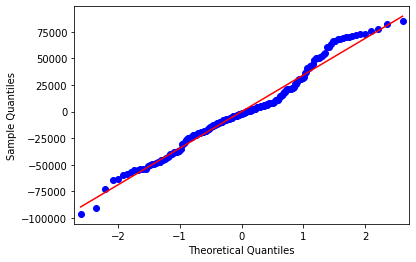

In [53]:
import pylab
# check for the normality of the residuals
sm.qqplot(final_model.resid, line='s')
pylab.show()

 # Homoscedasicity

In [54]:
Data=pd.concat([X_train,y_train],axis=1)

In [55]:
Data['Fitted_value']=final_model.fittedvalues
Data['Residual']=final_model.resid

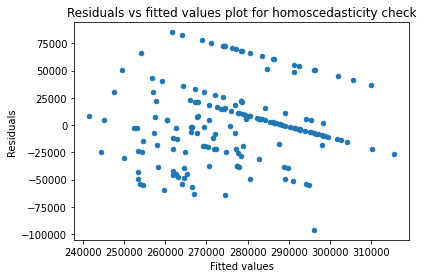

In [56]:
p = Data.plot.scatter(x='Fitted_value',y='Residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

# Model Error are IID

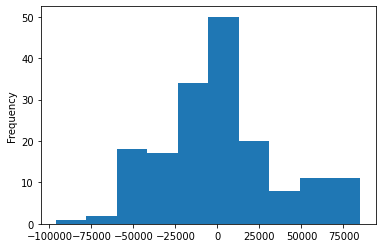

In [57]:
Data['Residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [58]:
X_test2 = X_test[['gender', 'degree_t', 'status', 'etest_p', 'mba_p']]

In [59]:
X_test2 = sm.add_constant(X_test2)

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [60]:
X_test2.head()

,const,gender,degree_t,status,etest_p,mba_p
108,1.0,1,0,1,84.00,58.31
207,1.0,1,0,1,88.56,71.55
106,1.0,1,2,0,71.00,65.69
107,1.0,1,0,1,80.00,73.52
51,1.0,1,0,0,67.00,62.65


In [61]:
y_predict=final_model.predict(X_test2)

In [62]:
test=pd.concat([X_test,y_test],axis=1)

In [63]:
test['Predicted']=y_predict

In [64]:
test.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,Predicted
108,1,0,0,1,0,0,0,1,109,61.00,82.00,69.0,84.00,58.31,300000.000000,274019.088572
207,1,0,1,1,0,1,0,1,208,83.33,78.00,61.0,88.56,71.55,300000.000000,291727.079777
106,1,1,1,2,2,0,0,0,107,61.08,50.00,54.0,71.00,65.69,288655.405405,309062.120237
107,1,1,1,1,0,0,1,1,108,82.00,90.00,83.0,80.00,73.52,200000.000000,290425.139488
51,1,0,0,1,0,0,1,0,52,54.40,61.12,56.2,67.00,62.65,288655.405405,292241.737828


# Performance on Test Data set

In [65]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(test['salary'], test['Predicted'])
# calculate the mean absolute error
model_mae = mean_absolute_error(test['salary'], test['Predicted'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.02e+09
MAE 2.28e+04
RMSE 3.2e+04


 # Performance on Training Data set

In [ ]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(Data['salary'], Data['Fitted_value'])
# calculate the mean absolute error
model_mae = mean_absolute_error(Data['salary'], Data['Fitted_value'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))